In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

In [2]:
# Define paths to your dataset
train_data_dir = './Processed/train'
test_data_dir = './Processed/test'

In [3]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 15

In [4]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

Found 1732 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 219 images belonging to 2 classes.


In [7]:
# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [8]:
# Freeze the convolutional layers
base_model.trainable = False

In [9]:
# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/15


55/55 [==============================] - 43s 745ms/step - loss: 0.6997 - accuracy: 0.5577 - val_loss: 0.6526 - val_accuracy: 0.5982
Epoch 2/15
55/55 [==============================] - 32s 574ms/step - loss: 0.6223 - accuracy: 0.6611 - val_loss: 0.6149 - val_accuracy: 0.6575
Epoch 3/15
55/55 [==============================] - 32s 572ms/step - loss: 0.5717 - accuracy: 0.7188 - val_loss: 0.5731 - val_accuracy: 0.7215
Epoch 4/15
55/55 [==============================] - 31s 570ms/step - loss: 0.5435 - accuracy: 0.7483 - val_loss: 0.5272 - val_accuracy: 0.7626
Epoch 5/15
55/55 [==============================] - 32s 576ms/step - loss: 0.5161 - accuracy: 0.7760 - val_loss: 0.5094 - val_accuracy: 0.7626
Epoch 6/15
55/55 [==============================] - 31s 570ms/step - loss: 0.4896 - accuracy: 0.7841 - val_loss: 0.4784 - val_accuracy: 0.7900
Epoch 7/15
55/55 [==============================] - 32s 575ms/step - loss: 0.4645 - accuracy: 0.8089 - val_loss: 0.4763 - val_accuracy: 0.78

In [13]:
# Save the trained model
model.save('26_11_2023_drowsiness_detection_mobilenetv2.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Plot the training and validation curves
import matplotlib.pyplot as plt

In [15]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

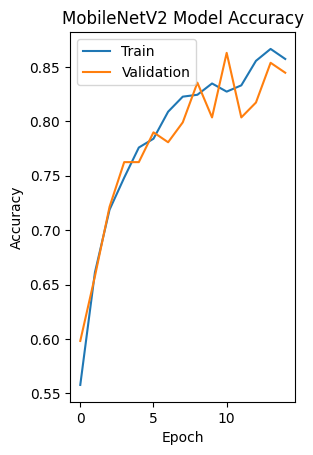

In [16]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

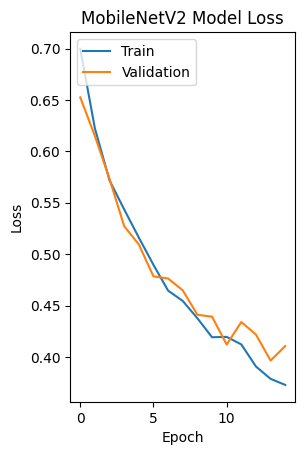

In [17]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [2]:
from keras.models import load_model
model = load_model('27_11_2023_(00_17)_drowsiness_detection_mobilenetv2.h5')